In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 31 17:19:37 2020

@author: lixiangk
"""

from interface import *

# `Genesis 1.3 Version 2`

## Generate an input file 

In [2]:
workdir = r'\\afs\ifh.de\group\pitz\data\lixiangk\work\sync\python\genesis13'
os.chdir(workdir)

In [3]:
P0 = 17 # MeV/c
#P0 = 2.054595E+01

Q = 4000e-12 # Coulumb

lam_s = 100e-6
Nu, lam_u, B = 120, 3.0e-2, 1.2799839

K = 3.49

FWHM = 20e-12 # second
sigma_z = FWHM*g_c
curpeak = -Q/FWHM; print ('peak current: ', curpeak)

Ek = momentum2kinetic(P0) # MeV
gamma = kinetic2gamma(Ek); # unitless
delgam = gamma*0.5e-2

freq_s = g_c/lam_s
print ('resonant wavelength from kinetic energy: ', lam_s*1e6, ' um')

# define the # of slices, usually the slices in the electron bunch + the number of undulator period
nslice = Nu+sigma_z/lam_s; print ('# of slice: ', nslice-Nu)
nslice = 180
ntail = 0

# define electron parameters, which are dominated by the input particle file, thougth
emit_x, emit_y = 4e-6, 4e-6
sigma_x, sigma_y = 1.58e-3, 0.18543e-3
alpha_x, alpha_y = 7.18, 1.72

delz = 0.5
ipseed = 1
fname = 'pithz.%d' % ipseed

beamfile = '../pithz.2745.019'
maginfile = '../LCLS-I.lat'

gen = Genesis2()

# set undulator parameters
gen.set(aw0   = K/np.sqrt(2.),
        awd   = K/np.sqrt(2.),
        nwig  = Nu,
        xlamd = lam_u,
        iertyp= 0,
        delaw = 0,
        iseed = -1)

# set electron beam parameters
gen.set(gamma0  = gamma,
        delgam  = delgam,
        curpeak = curpeak,
        rxbeam  = sigma_x,
        rybeam  = sigma_y,
        emitx   = emit_x,
        emity   = emit_y,
        alphax  = alpha_x,
        alphay  = alpha_y,
        npart   = 8192*2)

# set particle-loading parameters
gen.set(ipseed = 1,
        nbins  = 16)

# set mesh paremeters
gen.set(nptr = 170,
        dgrid= 0.02, 
        nscr = 2, 
        nscz = 1)

# set time-dependent parameters/grids
gen.set(itdp   = 1,
        nslice = nslice,
        ntail  = ntail,
        iotail = 1,
        curlen = sigma_z)

# set radiation parameters
gen.set(xlamds = lam_s, 
        zrayl  = 3.5251E-02) 

# set simulation control parameters
gen.set(delz  = delz,
        zstop = Nu*lam_u)

# set input and ouput control parameters
gen.set(ffspec = 1,
        ippart = 0, 
        ipradi = 0,
        beamfile   = beamfile,
        outputfile = fname+'.out',
        maginfile = maginfile,
        lout = [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

gen.write(fname+'.in')
gen.qsub(fname+'.sh')

print(gen.output)

peak current:  -200.00000000000003
resonant wavelength from kinetic energy:  100.0  um
# of slice:  59.9584916
 $newrun 
 aw0=2.467803
 awd=2.467803
 nwig=120
 xlamd=0.03
 iertyp=0
 delaw=0
 iseed=-1
 gamma0=33.2832
 delgam=0.166416
 curpeak=-200
 rxbeam=0.00158
 rybeam=0.00018543
 emitx=4e-06
 emity=4e-06
 alphax=7.18
 alphay=1.72
 npart=16384
 ipseed=1
 nbins=16
 nptr=170
 dgrid=0.02
 nscr=2
 nscz=1
 itdp=1
 nslice=180
 ntail=0
 iotail=1
 curlen=0.005995849
 xlamds=0.0001
 zrayl=0.035251
 delz=0.5
 zstop=3.6
 ffspec=1
 ippart=0
 ipradi=0
 beamfile='../pithz.2745.019'
 outputfile='pithz.1.out'
 maginfile='../LCLS-I.lat'
 lout=1 1 1 1 1 0 1 1 1 1 1 
 $end




## Generating input files for parameter scan

In [4]:
#%% Batch generating inputs for parameter scan
var1 = np.arange(1, 11)
var2 = [0, 0.01, 0.05, 0.1, 0.2]

combi = np.array([[v1, v2] for v1 in var1 for v2 in var2])

for x in combi:
    
    # undulator error 
    # iseed = np.random.randint(5000, 10000)
    # Kerr = 0 # K/np.sqrt(2.)*(0.01+0.01*rr)
    # gen.set(iseed = iseed, delaw = Kerr, iertyp = 0)
    
    # shot noise
    ipseed = int(x[0])
    
    # bunching factor
    bunch = x[1]
    
    # output name
    fname = 'pithz.%d.%.2f' % (ipseed, bunch)
    
    gen.set(ipseed = ipseed)
    gen.set(bunch = bunch)
    
    gen.set(outputfile = fname+'.out')

    gen.write(fname+'.in')
    gen.qsub(fname+'.sh', fname+'.in')

# `Genesis 1.3 version 4`

## Generate an input file

In [2]:
workdir = r'temp'
os.chdir(workdir)

In [5]:
P0 = 17 # MeV/c
gamma0 = M2G(P0)

lambda0 = 100e-6
lam_u = 30e-3
delz = lam_u/2

setup = Namelist('setup', 
                 rootname = 'test',
                 lattice = 'gen4lat.lat',
                 beamline = 'THzBL',
                 gamma0 = gamma0,
                 lambda0 = lambda0,
                 delz = delz,
                 seed = 1,
                 npart = 8192,
                 nbins = 4,
                 one4one = False,
                 shotnoise = True)

time = Namelist('time',
                s0 = 0,
                slen = 15e-3,
                sample = 1,
                time = True)

profile_gauss = Namelist('profile_gauss', 
                         label = 'beampro',
                         c0 = 150.0,
                         s0 = 2.5e-3,
                         sig = 1e-3)

profile_step = Namelist('profile_step', 
                         label = 'beampro',
                         c0 = 150.0,
                         s_start = 0e-3,
                         s_end = 5e-3)

beam = Namelist('beam',
                gamma = gamma0,
                delgam = gamma0*0.5e-2,
                current = '@beampro',
                ex = 4e-6,
                ey = 4e-6,
                betax = 19.99072,
                betay = 0.74887,
                alphax = 10.93,
                alphay = 3.25,
                bunch = 0,
                emod = 0)


# Import hdf5 file, where x, y, xp=Px/Pz, yp, gamma=beta*gamma, t are saved
importdist = Namelist('importdistribution',
                      file = 'test_dist.h5',
                      charge = 1e-9,
                      slicewidth = 0.01)

# Import slice based beam distribution, following the internal format of Genesis1.3
importbeam = Namelist('importbeam',
                      file = 'test.0.par.h5',
                      time = True)

efield = Namelist('efield',
                  rmax = 0,
                  nz = 1,
                  nphi = 2,
                  ngrid = 170)

field = Namelist('field',
                 power = 0,
                 phase = 0,
                 dgrid = 20e-3,
                 ngrid = 201)

track = Namelist('track',
                 output_step = 1,
                 field_dump_step = 0,
                 beam_dump_step = 0)

g4 = Genesis4(setup, time, profile_step, beam, field, track)
print(g4.output)

#g4.output = g4.output.lower()
g4.write('test.in')
#g4.qsub('test.sh', 'test.in')

&setup 
 rootname=test
 lattice=gen4lat.lat
 beamline=THzBL
 gamma0=33.2832
 lambda0=0.0001
 delz=0.015
 seed=1
 npart=8192
 nbins=4
 one4one=false
 shotnoise=true
&end

&time 
 s0=0
 slen=0.015
 sample=1
 time=true
&end

&profile_step 
 label=beampro
 c0=150
 s_start=0
 s_end=0.005
&end

&beam 
 gamma=33.2832
 delgam=0.166416
 current=@beampro
 ex=4e-06
 ey=4e-06
 betax=19.99072
 betay=0.74887
 alphax=10.93
 alphay=3.25
 bunch=0
 emod=0
&end

&field 
 power=0
 phase=0
 dgrid=0.02
 ngrid=201
&end

&track 
 output_step=1
 field_dump_step=0
 beam_dump_step=0
&end




## Generating input files for parameter scan

In [8]:
#%% Batch generating inputs for parameter scan
for i in np.arange(1, 5):
    
    # shot noise
    seed = i
    
    fname = 'modulated.%d' % (seed)
    setup.set(rootname = fname, seed = seed)
    #setup.set(nbins = 1, shotnoise = False)
    importdist.set(file = 'test_dist2.h5')
    g4 = Genesis4(setup, time, profile_step, importdist, field, track)
    
    g4.write(fname+'.in')
    g4.sbatch(fname+'.sh', fname+'.in', cmd1 = 'module add gnu openmpi phdf5/1.10.6')

# Formats conversion with `interface/BeamFormat.py`

In [6]:
func = [Matching, astra2hdf5, astra2slice, resampleParticles, modulation1D]
for f in func:
    print(f.__name__, ' : ')
    help(f)

Matching  : 
Help on function Matching in module interface.BeamFormat:

Matching(inputName=None, inputDist=None, outputName=None, betax=0, betay=0, alphax=0, alphay=0, flipZ=False, P0=None)
    Astra input particle format to hdf5 format used in Genesis1.3 Version 4

    Parameters
    ----------
    inputName : string, optional
        Name of the input particle file. If defined, prefered than inputDist.
        None by default.
    inputDist : 10D array, optional
        Particle distribution from Astra, with absolute z and Pz. None by default.
    outputName: string, optional
        Name of the output particle file.
    betax, betay, alphax, alphay: Twiss parameters to be matched
    Returns
    -------
    dist : 10D array
        Particle distribution in Astra format

    --------------
    Examples
    --------
    ```
    fname = 'ast.2529.003'
    fout = 'ast_.2529.013'
    kwargs = {}
    kwargs.update(
        inputName = fname,
        outputName = fout,
        betax = 5.11

## `Astra` format to slice-wise parameters for `Genesis 1.3 version 2`

In [ ]:
# Convert from Astra to Warp
r = astra2slice('ast.0528.001', nslice = 50, nc = 2)

## `Astra` format to hdf5 format for `Genesis 1.3 version 4`
### Use `importdistribution`

In [ ]:
fname = 'beam_modulated.ini'
fout = 'beam_modulated.h5'
kwargs = dict(inputName = fname,
             outputName = fout)
astra2hdf5(**kwargs)

### Use `importbeam`

The distribution is saved to scan.5.out.par.h5
Bunch length in mm:  8.331554999998048
83
# of slices:  0 , current =  0.08993306482428307  /  0.0  A
# of slices:  1 , current =  0.11391521544409187  /  0.14299533380369978  A
# of slices:  2 , current =  0.2757947321278014  /  0.2081832772834974  A
# of slices:  3 , current =  0.3657277969520844  /  0.2783442794516941  A
# of slices:  4 , current =  0.3957054852268454  /  0.3319279223847881  A
# of slices:  5 , current =  0.35373672164218  /  0.3644284658376301  A
# of slices:  6 , current =  0.40170102288179765  /  0.3934045686026065  A
# of slices:  7 , current =  0.4256831735016065  /  0.41325791401779477  A
# of slices:  8 , current =  0.40170102288179765  /  0.4280059628192302  A
# of slices:  9 , current =  0.48563855005112855  /  0.47758795968742346  A
# of slices:  10 , current =  0.5695760772204594  /  0.5409924617883554  A
# of slices:  11 , current =  0.6595091420447425  /  0.5950989368444828  A
# of slices:  12 , current =  

\\afs\ifh.de\group\pitz\data\lixiangk\work\sync\python\genesis13\Astra2GenesisSlices.py:1031: RuntimeWarning: divide by zero encountered in divide
  ax1.plot(stat[:ilast,0], 1/stat[:ilast,5], 'k--')


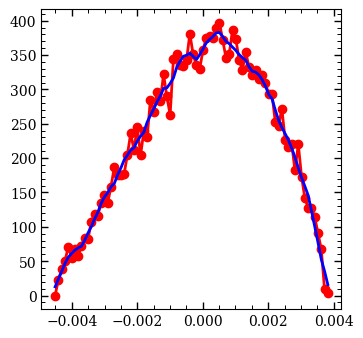

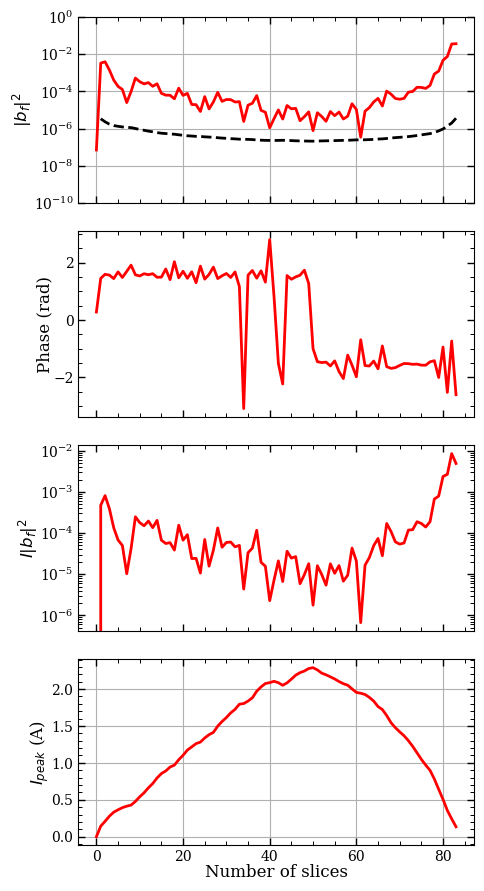

In [9]:
fname = 'sampled.2809.001'
from Astra2GenesisSlices import *
curpeak, curlen, Nslice, Nbins, outputName = Astra2GenesisSlices(fname, 
                                              outputName = 'scan', 
                                              seed = 5, 
                                              npart = 4096,
                                              Qscale = 1, #Qtot/2, 
                                              zscale = 1, #1.115, #(Qtot/Ipeak)/(2/100),
                                              lambda0 = 100e-6,
                                              degree = 4, # for smoothing
                                              nperlambda = 1,
                                              bunch = 0.0, 
                                              useHammersley = 0)